(460, 600)


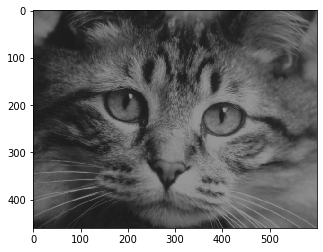

In [1]:
# read and show the given image
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/Users/tudou/Downloads/COMP9517T202/Lab_1/cat.png", cv2.IMREAD_GRAYSCALE)
print(img.shape)
plt.imshow(img, cmap='gray', vmin=0, vmax=255 )
plt.show()

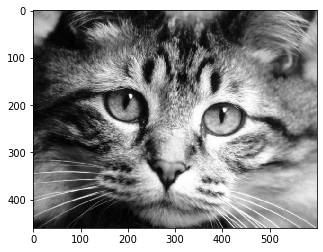

In [2]:
# Question 1
import numpy as np

img1 = (img - np.min(img)) * (255/(np.max(img) - np.min(img)))
plt.imshow(img1, cmap="gray", vmin=0, vmax=255)
plt.show()

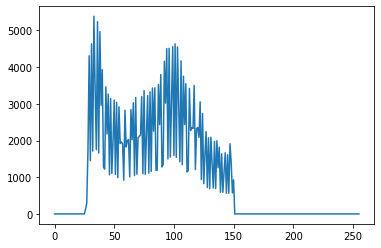

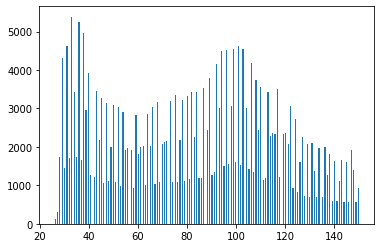

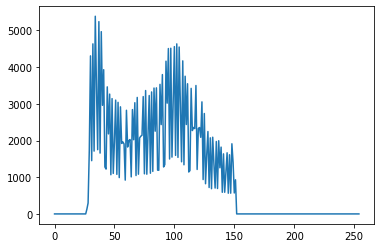

In [3]:
# Question 2

imgHist = cv2.calcHist([img],[0],None,[256],[0,255])
plt.plot(imgHist)
plt.show()

# or implemented by
data = list(img[:,:].flatten())
plt.hist(data, bins=256)
plt.show()

# without using in-built function
from bisect import bisect 
breakpoints = list(range(0,255))
def bin_data(val, breakpoints=[60, 70, 80, 90], bins=[4,3,2,1]):
        i = bisect(breakpoints, val)
        return bins[i]
    
binned = [bin_data(i,breakpoints, breakpoints) for i in data]
    
hist = np.zeros(len(breakpoints))
for i in binned:
    idx = breakpoints.index(i)
    hist[idx] += 1

plt.plot(breakpoints, hist)
plt.show()

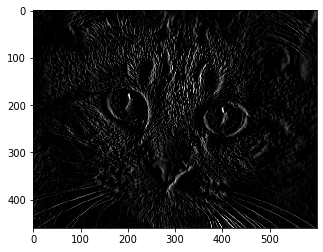

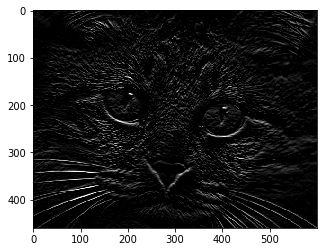

In [4]:
# Question 3

sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

sbl_x = cv2.filter2D(img, -1, sobel_x)
sbl_y = cv2.filter2D(img, -1, sobel_y)

plt.imshow(sbl_x, cmap='gray', vmin=0, vmax=255)
plt.show()
plt.imshow(sbl_y, cmap='gray', vmin=0, vmax=255)
plt.show()

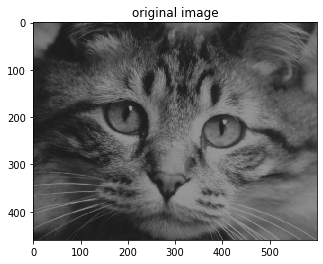

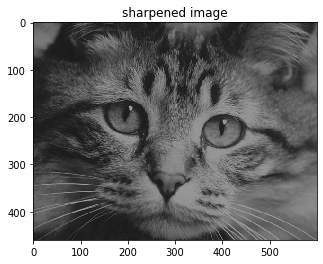

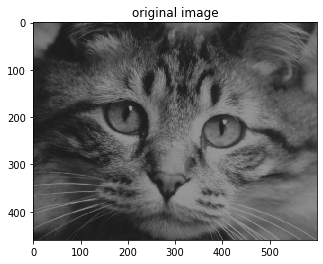

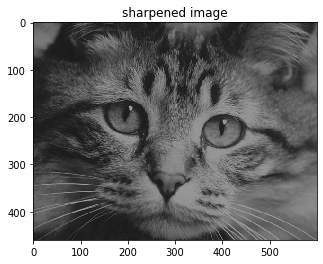

In [6]:
# Question 4
img_L = cv2.GaussianBlur(img, (9,9), 1.0)
img_sharpened = cv2.addWeighted(img, 1.0+1.25, img_L, -1.25, 0)

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255 )
plt.title("original image")
plt.figure(2)
plt.imshow(img_sharpened,cmap='gray', vmin=0, vmax=255)
plt.title("sharpened image")
plt.show()

# or implemented without using in-built function
def unsharp_mask(image, kernel_size=(9, 9), sigma=1.0, amount=1.25, threshold=0):
    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

sharpened_image = unsharp_mask(img)

plt.figure(1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255 )
plt.title("original image")
plt.figure(2)
plt.imshow(sharpened_image,cmap='gray', vmin=0, vmax=255)
plt.title("sharpened image")
plt.show()